<a href="https://colab.research.google.com/github/fabiacamile/sudoku-case-stage/blob/main/Solu%C3%A7%C3%A3oSudoku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solução para o problema Sudoku
---


O problema consiste em encontrar uma solução válida, dado um tabuleiro de Sudoku incompleto representado por uma matriz quadrada 9x9

Regras:


*   Cada um dos dígitos de 1 a 9 deve aparecer exatamente uma vez em cada linha.
*   Cada um dos dígitos de 1 a 9 deve aparecer exatamente uma vez em cada coluna.
*   Cada um dos dígitos de 1 a 9 deve aparecer exatamente uma vez em cada um dos 9 subquadrados 3x3 do tabuleiro.

---


Restrições:

* Não é possível substituir o elemento em uma célula que não esteja vazia.




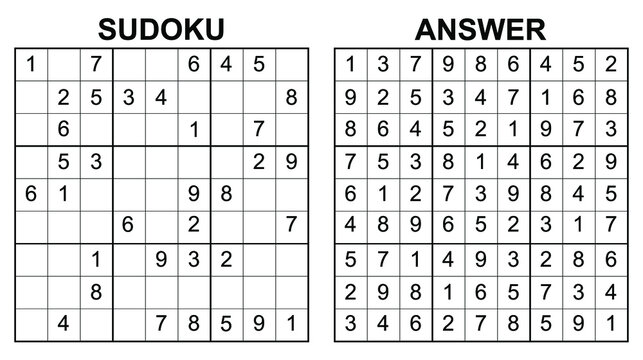

### **Lógica usada no código**


---

O código usa um algoritmo de backtracking para resolver o Sudoku. O backtracking é um método recursivo que tenta cada possibilidade até encontrar uma solução.

No caso do Sudoku, o algoritmo começa procurando a próxima célula vazia. Se não houver mais células vazias, o Sudoku está resolvido. Se houver células vazias, o algoritmo testa valores de 1 a 9 para a célula vazia.

Se um número for válido para a célula vazia, o algoritmo tenta preencher as células restantes. Se a atribuição atual levar a uma solução, o algoritmo retorna True. Se a atribuição atual não levar a uma solução, o algoritmo desfaz e tenta outro número.

O algoritmo continua tentando cada possibilidade até encontrar uma solução ou até que todas as possibilidades tenham sido esgotadas. Se todas as possibilidades forem esgotadas e não houver solução, o algoritmo retorna False.


In [74]:

# Função para verificar se um número pode ser inserido em determinada posição (linha, coluna)
def is_safe(grid, row, col, num):
    # Verifica se o número não está presente na linha
    if num in grid[row]:
        return False

    # Verifica se o número não está presente na coluna
    for i in range(9):
        if grid[i][col] == num:
            return False

    # Verifica se o número não está presente na sub-grade 3x3
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(3):
        for j in range(3):
            if grid[i + start_row][j + start_col] == num:
                return False

    return True


# Função para encontrar a próxima célula vazia
def find_empty_location(grid):
    for i in range(9):
        for j in range(9):
            if grid[i][j] == 0:
                return i, j
    return -1, -1


# Função principal para resolver o Sudoku
def solves_sudoku(grid):
    row, col = find_empty_location(grid)

    # Se não houver mais células vazias, o Sudoku está resolvido
    if row == -1 and col == -1:
        return True

    # Testa valores de 1 a 9 para a célula vazia
    for num in range(1, 10):
        if is_safe(grid, row, col, num):
            grid[row][col] = num

            # Recursivamente tenta preencher as células restantes
            if solves_sudoku(grid):
                return True

            # Se a atribuição atual não levar a uma solução, desfaz e tenta outro número
            grid[row][col] = 0

    # Se nenhum número pode ser atribuído, retorna False
    return False


# Função para imprimir o grid do Sudoku
def print_grid(grid):
  if solves_sudoku(grid):
        # Imprime a solução
        config_grid(grid)
  else:
        print("No solution exists")

# Função para configurar o grid do sudoku
def config_grid(grid):
    for i in range(9):
        for j in range(9):
            print(grid[i][j], end=" ")

        print()


In [77]:
print_grid(
    [
        [3, 0, 6, 5, 0, 8, 4, 0, 0],
        [5, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 8, 7, 0, 0, 0, 0, 3, 1],
        [0, 0, 3, 0, 1, 0, 0, 8, 0],
        [9, 0, 0, 8, 6, 3, 0, 0, 5],
        [0, 5, 0, 0, 9, 0, 6, 0, 0],
        [1, 3, 0, 0, 0, 0, 2, 5, 0],
        [0, 0, 0, 0, 0, 0, 0, 7, 4],
        [0, 0, 5, 2, 0, 6, 3, 0, 0]
    ]
)

3 1 6 5 7 8 4 9 2 
5 2 9 1 3 4 7 6 8 
4 8 7 6 2 9 5 3 1 
2 6 3 4 1 5 9 8 7 
9 7 4 8 6 3 1 2 5 
8 5 1 7 9 2 6 4 3 
1 3 8 9 4 7 2 5 6 
6 9 2 3 5 1 8 7 4 
7 4 5 2 8 6 3 1 9 


### **Visualização**
---
Plotagem gráfica da Solução do Sudoku, usando a bibliteca Matplotlib

In [46]:
import matplotlib.pyplot as plt

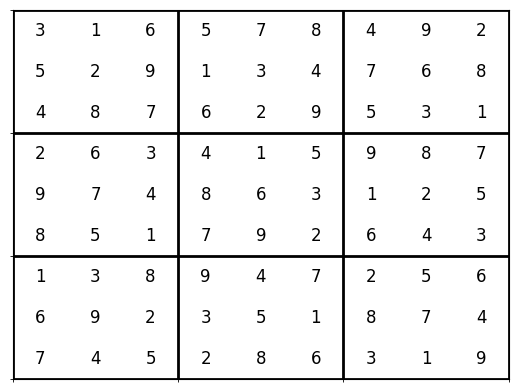

In [76]:
# Cria um tabuleiro de sudoku dado como uma string.
def showSudoku(grid_string):
    # Converte a string em uma matriz 9x9 de números inteiros:
    grid = [[int(grid_string[i * 9 + j]) for j in range(9)] for i in range(9)]

    # Cria uma figura e eixos para plotagem:
    fig, ax = plt.subplots()

    # Configura as linhas da grade:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticks(range(0, 10, 3), minor=True)
    ax.set_yticks(range(0, 10, 3), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2) # Mostra linhas da grade

    # Define os limites do gráfico:
    ax.set_xlim(0, 9)
    ax.set_ylim(0, 9)

    # Adiciona números às células da grade:
    for i in range(9):
        for j in range(9):
            if grid[i][j] != 0:
                ax.text(j + 0.5, 8.5 - i, str(grid[i][j]), fontsize=12, ha='center', va='center')

    # Exibe o gráfico:
    plt.show()

# Matriz como uma string sem espaços
sudoku_string = "316578492529134768487629531263415987974863125851792643138947256692351874745286319"

# Chama a função showSudoku com a matriz como uma string
showSudoku(sudoku_string)